In [3]:
#%matplotlib notebook
# removed as jupyter keeps hanging when trying to rotate the 3D plot

In [4]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import sys

In [5]:
names=["TestID", "fuzzingOperationTimes", "staticCollision", "dynamicCollision", "cellTime", "FuzzingOpCount"]

In [6]:
res_col_subset=["fuzzingOperationTimes", "staticCollision", "dynamicCollision"]

In [7]:
# https://stackoverflow.com/questions/68522283/removing-dominated-rows-from-a-pandas-dataframe-rows-with-all-values-lower-th
def get_dominants(df):
    seen = [] # keep track of tested rows
    idx = df.index # initial index
    for i in range(len(df)+1):
        x = idx[0]
        if x in seen:   # done a full loop
            return df.loc[idx]
        seen.append(idx[0])
        # check which rows are dominated and drop them from the index
        idx = (df.loc[idx]-df.loc[x]).le(0).all(axis=1)
        # put tested row at the end
        idx = list(idx[~idx].index)+[x]

In [8]:
timebased_res = pd.read_csv("steppingcell-timebased-tts-cutdown", delim_whitespace=True, names=names, header=1)

In [9]:
def dataframe_chosen_cols_to_csv(df, csv_file):
    subset_df = df[res_col_subset].copy()
    subset_df.to_csv(csv_file, index=False, header=False)

In [10]:
def dominant_subset_cols(df):
    return get_dominants(df[res_col_subset])

In [11]:
timebased_res = pd.read_csv("steppingcell-timebased-tts-cutdown", delim_whitespace=True, names=names, header=0)
condbased_res = pd.read_csv("steppingcell-condbased-tts-cutdown", delim_whitespace=True, names=names, header=0)
dtimebased = dominant_subset_cols(timebased_res)
dcondbased = dominant_subset_cols(condbased_res)
dataframe_chosen_cols_to_csv(dtimebased, "timebased_res1000.pf")
dataframe_chosen_cols_to_csv(dcondbased, "condbased_res1000.pf")

In [12]:
timebased_res

,TestID,fuzzingOperationTimes,staticCollision,dynamicCollision,cellTime,FuzzingOpCount
0,Test:Test_554_13_08_2023_12_59_58,-305.726,34.0,38.0,135.00,3
1,Test:Test_563_13_08_2023_12_59_58,-0.011,0.0,0.0,0.00,1
2,Test:Test_203_12_08_2023_17_03_47,-457.474,112.0,34.0,159.42,9
3,Test:Test_148_12_08_2023_13_56_24,-201.852,0.0,12.0,168.38,4
4,Test:Test_694_13_08_2023_21_59_48,-399.682,5.0,0.0,182.26,3
5,Test:Test_794_14_08_2023_03_36_57,-209.453,200.0,0.0,163.02,4
6,Test:Test_241_12_08_2023_20_14_25,-135.803,1.0,34.0,99.02,3
7,Test:Test_741_13_08_2023_23_51_04,-363.858,135.0,6.0,163.70,5
8,Test:Test_596_13_08_2023_14_45_49,-282.198,87.0,5.0,147.56,6
9,Test:Test_910_14_08_2023_11_21_39,-350.329,116.0,2.0,156.08,6


In [13]:
condbased_res

,TestID,fuzzingOperationTimes,staticCollision,dynamicCollision,cellTime,FuzzingOpCount
0,Test:Test_712_18_08_2023_18_53_57,294.32,180.0,0.0,26.76,2
1,Test:Test_727_18_08_2023_19_52_26,121.04,0.0,32.0,143.24,3
2,Test:Test_800_19_08_2023_00_49_35,93.92,3.0,0.0,167.68,3
3,Test:Test_806_19_08_2023_00_49_35,161.70,6.0,52.0,139.34,3
4,Test:Test_917_19_08_2023_09_06_28,316.80,17.0,0.0,174.62,4
5,Test:Test_952_19_08_2023_11_14_46,172.72,4.0,0.0,183.52,2
6,Test:Test_840_19_08_2023_02_51_12,11.52,3.0,1.0,87.20,2
7,Test:Test_711_18_08_2023_18_53_57,108.00,67.0,2.0,127.34,3
8,Test:Test_694_18_08_2023_17_55_53,105.38,33.0,3.0,101.46,3
9,Test:Test_864_19_08_2023_04_54_24,163.30,10.0,44.0,143.36,3


In [14]:
dominant_subset_cols(timebased_res)

,fuzzingOperationTimes,staticCollision,dynamicCollision
0,-305.726,34.0,38.0
1,-0.011,0.0,0.0
2,-457.474,112.0,34.0
5,-209.453,200.0,0.0
6,-135.803,1.0,34.0
7,-363.858,135.0,6.0
8,-282.198,87.0,5.0
9,-350.329,116.0,2.0
10,-31.183,18.0,2.0
11,-80.557,6.0,20.0


In [15]:
dominant_subset_cols(condbased_res)

,fuzzingOperationTimes,staticCollision,dynamicCollision
0,294.32,180.0,0.0
3,161.70,6.0,52.0
4,316.80,17.0,0.0
7,108.00,67.0,2.0
9,163.30,10.0,44.0
11,283.62,2.0,33.0
12,129.38,57.0,40.0
16,253.30,24.0,17.0
19,253.50,48.0,13.0
23,297.18,38.0,8.0


In [16]:
def plot_3d_resultset(df, df2, graph_title, savefigFilename,xrot,yrot):
    default_alpha = 1.0
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')    
    ax.view_init(xrot,yrot)
    ax.scatter(df["staticCollision"], df["dynamicCollision"], abs(df["fuzzingOperationTimes"]), color="blue", alpha=default_alpha)
    
    if not (df2 is None):
        ax.scatter(df2["staticCollision"], df2["dynamicCollision"], abs(df2["fuzzingOperationTimes"]), color="green", alpha=default_alpha)

    ax.set_xlabel("Static collision metric")
    ax.set_ylabel("Dynamic collision metric")
    ax.set_zlabel("Fuzzing Operation Times")
    ax.set_title(graph_title)
    plt.tight_layout(pad=0.1)
    plt.savefig(savefigFilename)
    plt.show()

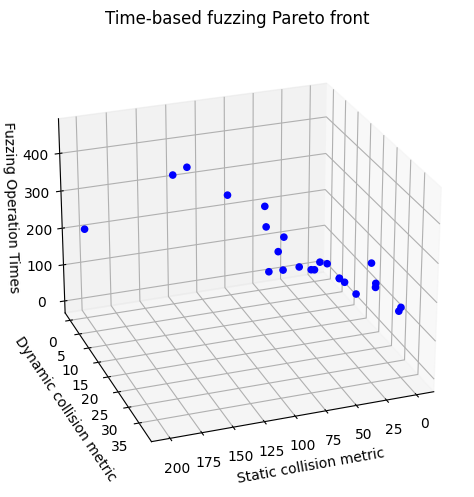

In [17]:
plot_3d_resultset(dtimebased, None, "Time-based fuzzing Pareto front", "rq1-timebased-tts-3d-pareto.pdf", 25, 70)

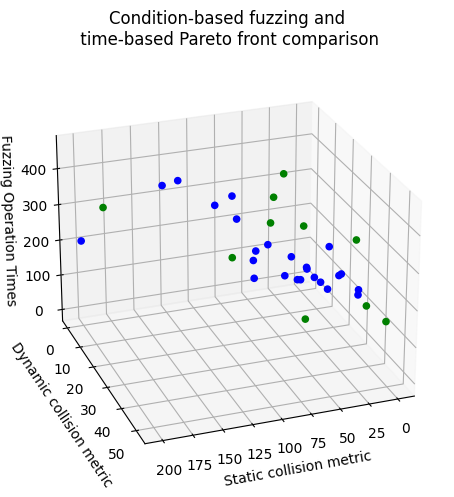

In [18]:
plot_3d_resultset(dtimebased, dcondbased, "Condition-based fuzzing and\n time-based Pareto front comparison", "rq2-condbased-tts-3d-pareto.pdf", 25, 70)

In [19]:
# Plot the times for condition-based fuzzing for both condition-based and time-based fuzzing
timebased_times = timebased_res["fuzzOpTimes"]

bins = np.linspace(0, 1000, 30)
plt.hist(timebased_times, bins, alpha=0.5, label='Timebased')
plt.title("Distribution of fuzzing times for both time-based and condition-based")
plt.legend(loc='upper right')
plt.show()


KeyError: 'fuzzOpTimes'

In [ ]:
# Plot the times for condition-based fuzzing for both condition-based and time-based fuzzing
condbased_times = timebased_res["fuzzOpTimes"]

bins = np.linspace(0, 1000, 30)
plt.hist(condbased_times, bins, alpha=0.5, label='Timebased')
plt.title("Distribution of fuzzing times for both time-based and condition-based")
plt.legend(loc='upper right')
plt.show()


In [ ]:
# Plot the times for condition-based fuzzing for both condition-based and time-based fuzzing
timebased_times = timebased_res["fuzzOpTimes"]
condbased_times = condbased_res["fuzzOpTimes"]

bins = np.linspace(0, 1000, 30)
plt.hist(timebased_times, bins, alpha=0.5, label='Timebased')
plt.hist(condbased_times, bins, alpha=0.5, label='Condition-based')
plt.title("Distribution of total fuzzing times in the final front for both time-based and condition-based")
plt.legend(loc='upper right')
plt.show()


In [ ]:
fig, axes = plt.subplots(2, 1)
# Plot the times for condition-based fuzzing for both condition-based and time-based fuzzing
timebased_times = timebased_res["fuzzOpTimes"]
condbased_times = condbased_res["fuzzOpTimes"]

plt.suptitle("Distribution of fuzzing times for\n both time-based and condition-based variants")
bins = np.linspace(0, 600, 20)
axes[0].hist(timebased_times, bins, alpha=1.0, label='Time-based')
axes[0].legend(loc='upper right')
#axes[0].set(xlabel="Total fuzzing operation time (s)")

axes[1].hist(condbased_times, bins, alpha=1.0, color="green", label='Condition-based')
axes[1].legend(loc='upper right')
axes[1].set(xlabel="Total fuzzing operation time (s)")
plt.savefig("rq2-fuzzing-times.pdf")
plt.show()


In [ ]:
a = np.array([1,2,3])
b = np.array([4,5,6])
a / b

In [ ]:
def get_metric_time_ratios(res_df, metric_dfname):
    metric_time_ratio = res_df[metric_dfname] / res_df["fuzzOpTimes"]
    return metric_time_ratio

In [ ]:
timebased_ratios_human = get_metric_time_ratios(timebased_res, "uvExcessHuman")
condbased_ratios_human = get_metric_time_ratios(condbased_res, "uvExcessHuman")
timebased_ratios_surface = get_metric_time_ratios(timebased_res, "uvMissSurface")
condbased_ratios_surface = get_metric_time_ratios(condbased_res, "uvMissSurface")

In [ ]:
def plot_relative_ratios(timebased_ratio, timebased_label, condbased_ratio, condbased_label, xlabel, xmax, fig_filename):
    fig, axes = plt.subplots(2, 1)
    # Plot the times for condition-based fuzzing for both condition-based and time-based fuzzing

    plt.suptitle("Distribution of fuzzing metric ratios\n for both time-based and condition-based variants")
    bins = np.linspace(0, xmax, 20)
    axes[0].hist(timebased_ratio, bins, alpha=1.0, label=timebased_label)
    axes[0].legend(loc='upper right')

    axes[1].hist(condbased_ratio, bins, alpha=1.0, color="green", label=condbased_label)
    axes[1].legend(loc='upper right')
    axes[1].set(xlabel=xlabel)
    plt.savefig(fig_filename)
    plt.show()

In [ ]:
timebased_ratios_human

In [ ]:
plot_relative_ratios(timebased_ratios_human, "Time-based fuzzing", condbased_ratios_human, "Condition-based fuzzing", "Human metric ratio per time", 0.2, "rq2_human_metric_ratio.pdf")


In [ ]:
plot_relative_ratios(timebased_ratios_surface, "Time-based fuzzing", condbased_ratios_surface, "Condition-based fuzzing", "Human metric ratio per time", 0.2, "rq2_human_metric_ratio.pdf")